**2. DATA UNDERSTANDING**

**a) Imported Relevant Modules**

In [60]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder


**b) Loading Dataset**

In [61]:
# Load the dataset
data = pd.read_csv('../../AfricaConflictDataset.csv')

# Display the first few rows of the dataset
data.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,MLI33921,28/02/2025,2025,1,Political violence,Explosions/Remote violence,Remote explosive/landmine/IED,JNIM: Group for Support of Islam and Muslims,NaN,Rebel group,...,Ibdakan,18.9689,2.0041,2,Al Zallaqa,New media,"On 28 February 2025, JNIM claimed to have targ...",0,NaN,1741039795
1,BFO13376,28/02/2025,2025,1,Political violence,Battles,Armed clash,JNIM: Group for Support of Islam and Muslims,NaN,Rebel group,...,Gnangdin,11.3693,-0.3600,1,Undisclosed Source,Local partner-Other,"On 28 February 2025, an armed group (likely JN...",0,NaN,1741039795
2,MLI33922,28/02/2025,2025,1,Political violence,Violence against civilians,Attack,Military Forces of Mali (2021-),Wagner Group,State forces,...,Eghacher-Sediden,18.5558,1.1113,1,Twitter,New media,"On 28 February 2025, a FAMa and Wagner patrol ...",0,NaN,1741039795
3,GHA2795,28/02/2025,2025,1,Political violence,Violence against civilians,Attack,Land Guards,NaN,External/Other forces,...,Bibiani,6.4667,-2.3333,2,3 News,National,"On 28 February 2025, a land guard shot a farme...",0,NaN,1741039795
4,GHA2800,28/02/2025,2025,1,Political violence,Riots,Mob violence,Rioters (Ghana),NaN,Rioters,...,Accra,5.5560,-0.1969,3,Ghana Web,National,"On 28 February 2025, citizens threw stones at ...",0,crowd size=no report,1741039795


**C) Data Shape**

In [62]:
print('Our data has {} rows and {} columns'.format(data.shape[0], data.shape[1]))

Our data has 413947 rows and 31 columns


**d) Data Description**


In [63]:
data.describe()

,year,time_precision,iso,latitude,longitude,geo_precision,fatalities,timestamp
count,413947.000000,413947.000000,413947.000000,413947.000000,413947.000000,413947.000000,413947.000000,4.139470e+05
mean,2017.527964,1.130737,510.399988,6.922263,21.886800,1.279074,2.439153,1.676141e+09
std,6.608510,0.393477,250.075057,15.495063,16.776814,0.494604,24.320917,5.263689e+07
min,1997.000000,1.000000,12.000000,-34.706800,-25.163100,1.000000,0.000000,1.552576e+09
25%,2015.000000,1.000000,231.000000,0.315600,8.155500,1.000000,0.000000,1.622068e+09
50%,2020.000000,1.000000,566.000000,6.693600,28.043600,1.000000,0.000000,1.689711e+09
75%,2022.000000,1.000000,710.000000,13.515700,33.483300,2.000000,1.000000,1.724714e+09
max,2025.000000,3.000000,894.000000,37.281500,64.683200,3.000000,1350.000000,1.741072e+09


Our data includes events surrounding a armed conflict as well as the conflict outcome.


The Column Include: 

event_id_cnty:
A unique alphanumeric identifier combining a numeric ID with a country code (e.g., ETH9766).

event_date
The date on which the event occurred, recorded in YYYY-MM-DD format.

year:
The year during which the event took place.

time_precision:
A numeric code (1–3) indicating the precision of the event date, with 1 being the most precise.

disorder_type:
The overarching category of the event, such as Political violence, Demonstrations, or Strategic developments.

event_type:
The general classification of the event (e.g., Battles, Protests, Explosions/Remote violence).

sub_event_type:
A more specific classification within the event type (e.g., Armed clash, Peaceful protest).

actor1:
The primary actor involved in the event.

assoc_actor_1:
Additional or supporting actor(s) associated with actor1.

inter1:
A categorical code describing actor1’s type (e.g., Rebel group, State forces).

actor2:
The secondary actor involved in the event (which may represent a target or another involved party).

assoc_actor_2:
Additional or supporting actor(s) associated with actor2.

inter2:
A categorical code describing actor2’s type.

interaction:
A combined description derived from inter1 and inter2, indicating the nature of the interaction between the actors.

civilian_targeting:
An indicator specifying whether civilians were the primary target (e.g., “Civilians targeted”).

iso:
A three-digit ISO numeric code representing the country where the event occurred.

region:
The geographic region in which the event took place (e.g., Eastern Africa).

country:
The country in which the event occurred.

admin1:
The primary sub-national administrative region (e.g., state or province).

admin2:
The secondary sub-national administrative region (if applicable).

admin3:
The tertiary sub-national administrative region (if available).

location:
The specific name of the place where the event occurred.

latitude:
The latitude coordinate of the event location in decimal degrees.

longitude:
The longitude coordinate of the event location in decimal degrees.

geo_precision:
A numeric code (1–3) indicating the precision of the geographic data, with 1 being the most precise.

source:
The source(s) used to report the event, which may include multiple sources separated by semicolons.

source_scale:
Indicates the geographic closeness of the source to the event (e.g., Local partner, National).

notes:
Additional descriptive information about the event.

fatalities:
The number of reported fatalities resulting from the event (0 if none are reported).

tags:
Keywords or structured tags that provide additional context to the event (e.g., “women targeted: politicians”).

timestamp:
A Unix timestamp representing when the event was uploaded to the ACLED API, capturing the exact date and time of data entry.




**e) Datatypes**


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413947 entries, 0 to 413946
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   event_id_cnty       413947 non-null  object 
 1   event_date          413947 non-null  object 
 2   year                413947 non-null  int64  
 3   time_precision      413947 non-null  int64  
 4   disorder_type       413947 non-null  object 
 5   event_type          413947 non-null  object 
 6   sub_event_type      413947 non-null  object 
 7   actor1              413947 non-null  object 
 8   assoc_actor_1       114747 non-null  object 
 9   inter1              413947 non-null  object 
 10  actor2              301956 non-null  object 
 11  assoc_actor_2       85527 non-null   object 
 12  inter2              301956 non-null  object 
 13  interaction         413947 non-null  object 
 14  civilian_targeting  123147 non-null  object 
 15  iso                 413947 non-nul

**f) Duplicates**


In [65]:
data.duplicated().sum()


0

relevant_data.isna().sum()/data.shape[0]*100

**g) Missing Values**

Next, we will look at missing data by column percentage.

In [66]:
data.isna().sum()/data.shape[0]*100


event_id_cnty          0.000000
event_date             0.000000
year                   0.000000
time_precision         0.000000
disorder_type          0.000000
event_type             0.000000
sub_event_type         0.000000
actor1                 0.000000
assoc_actor_1         72.279785
inter1                 0.000000
actor2                27.054430
assoc_actor_2         79.338659
inter2                27.054430
interaction            0.000000
civilian_targeting    70.250539
iso                    0.000000
region                 0.000000
country                0.000000
admin1                 0.004107
admin2                 0.922823
admin3                49.294958
location               0.000000
latitude               0.000000
longitude              0.000000
geo_precision          0.000000
source                 0.000000
source_scale           0.000000
notes                  0.000000
fatalities             0.000000
tags                  77.179204
timestamp              0.000000
dtype: f

We will start by inspecting and handling columns with a large amount of missing data

In [67]:
for col in data.columns:
    if data[col].isna().sum()/data.shape[0]*100 > 50:
        print(f'{col}\n Missing value percent {data[col].isna().sum()/data.shape[0]*100:.2f}\n Unique values {data[col].unique()}')

assoc_actor_1
 Missing value percent 72.28
 Unique values [nan 'Wagner Group'
 'Al Adl Wa Al Ihssane; Labor Group (Morocco); LMDDH: Moroccan League for the Defense of Human Rights'
 ... 'San Ethnic Group (Namibia)'
 'Military Forces of Ethiopia (1991-2018); NDA: National Democratic Alliance (Sudan)'
 'Military Forces of the Central African Republic (1993-2003) Yakoma Faction']
assoc_actor_2
 Missing value percent 79.34
 Unique values ['Wagner Group' nan 'Farmers (Ghana)' ...
 'Aid Workers (Spain); Women (Spain); Aid Workers (United States)'
 'NADECO: National Democratic Coalition Militia'
 'Government of the United States (1993-2001)']
civilian_targeting
 Missing value percent 70.25
 Unique values [nan 'Civilian targeting']
tags
 Missing value percent 77.18
 Unique values [nan 'crowd size=no report' 'crowd size=scores' ...
 'crowd size=at least 35; sexual violence'
 'crowd size=3; women targeted: candidates for office'
 'crowd size=no report; sexual violence; women targeted: protesters

We can drop these columns as they contain a large amount of missing data and imputing them based on mean, mode or median will change their distributions

In [68]:
columns_to_drop = [col for col in data.columns if data[col].isna().sum()/data.shape[0]*100 > 50]
data = data.drop(columns = columns_to_drop, axis=1)

print(data.isna().sum())

event_id_cnty          0
event_date             0
year                   0
time_precision         0
disorder_type          0
event_type             0
sub_event_type         0
actor1                 0
inter1                 0
actor2            111991
inter2            111991
interaction            0
iso                    0
region                 0
country                0
admin1                17
admin2              3820
admin3            204055
location               0
latitude               0
longitude              0
geo_precision          0
source                 0
source_scale           0
notes                  0
fatalities             0
timestamp              0
dtype: int64


In [69]:
# dropping less relevant columns
data = data.drop(columns=['actor2', 'inter2', 'admin1', 'admin2','admin3','source_scale', 'notes'])
data = data.dropna()

**h) Variable Types**


In [70]:
# Separate categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Separate continuous (numerical) columns
continuous_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Display the separated columns
print(f"We have {len(categorical_columns)} categorical columns and {len(continuous_columns)} continuous columns")

We have 12 categorical columns and 8 continuous columns


**3. EDA & D DATA PREPARATION**

In the EDA section, we explored the various features in the data, clean and tranform some of the features.



***a) Basic Descriptive Statistics***

Continuous Columns: We will get an overview of the distribution, central tendency, and spread


In [71]:
data[continuous_columns].describe()

,year,time_precision,iso,latitude,longitude,geo_precision,fatalities,timestamp
count,413947.000000,413947.000000,413947.000000,413947.000000,413947.000000,413947.000000,413947.000000,4.139470e+05
mean,2017.527964,1.130737,510.399988,6.922263,21.886800,1.279074,2.439153,1.676141e+09
std,6.608510,0.393477,250.075057,15.495063,16.776814,0.494604,24.320917,5.263689e+07
min,1997.000000,1.000000,12.000000,-34.706800,-25.163100,1.000000,0.000000,1.552576e+09
25%,2015.000000,1.000000,231.000000,0.315600,8.155500,1.000000,0.000000,1.622068e+09
50%,2020.000000,1.000000,566.000000,6.693600,28.043600,1.000000,0.000000,1.689711e+09
75%,2022.000000,1.000000,710.000000,13.515700,33.483300,2.000000,1.000000,1.724714e+09
max,2025.000000,3.000000,894.000000,37.281500,64.683200,3.000000,1350.000000,1.741072e+09


Our continuous data seems to have different scales across different features. Hence we may need to scale it

Categorical Columns: We will get an overview of the distribution in each categorical column




In [72]:
data[categorical_columns].describe()

,event_id_cnty,event_date,disorder_type,event_type,sub_event_type,actor1,inter1,interaction,region,country,location,source
count,413947,413947,413947,413947,413947,413947,413947,413947,413947,413947,413947,413947
unique,413947,10275,4,6,25,6154,8,43,5,57,41526,29537
top,MLI33921,18/10/2023,Political violence,Battles,Armed clash,Al Shabaab,Protesters,Protesters only,Eastern Africa,Somalia,Khartoum,Undisclosed Source
freq,1,254,256514,105556,98598,17778,93991,83860,129294,48651,1946,46674


**Splitting Categorical from Numerical**


In [73]:

# Selecting categorical variables
categorical = data.select_dtypes(include=['object'])
#Selecting numerical variables
numerical = data.select_dtypes(include=['number'])

**Number of labels: cardinality**


In [74]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(data[var].unique()), ' labels')

event_id_cnty  contains  413947  labels
event_date  contains  10275  labels
disorder_type  contains  4  labels
event_type  contains  6  labels
sub_event_type  contains  25  labels
actor1  contains  6154  labels
inter1  contains  8  labels
interaction  contains  43  labels
region  contains  5  labels
country  contains  57  labels
location  contains  41526  labels
source  contains  29537  labels


Some of our categorical features have a lot of categories. Hence we may need to use target encoding to deal with high cardinality.

Target encoding replaces each category with the mean of the target variable for that category. This reduces the dimensionality by not increasing the number of features, which can help in preventing overfitting. Example: If a category is frequently associated with fatalities, the encoding will reflect that association. Target encoding should not alter the shape of our data.

**b) Feature Engineering**

In [75]:
# Feature Engineering of fatalities into severity levels
def categorize_fatalities(fatalities):
    if fatalities == 0:
        return 'Low'
    elif fatalities <= 10:
        return 'Medium'
    else:
        return 'High'

In [76]:
data['conflict_severity'] = data['fatalities'].apply(categorize_fatalities)
data['conflict_severity_coded'] = LabelEncoder().fit_transform(data['conflict_severity'])

**Visualization**

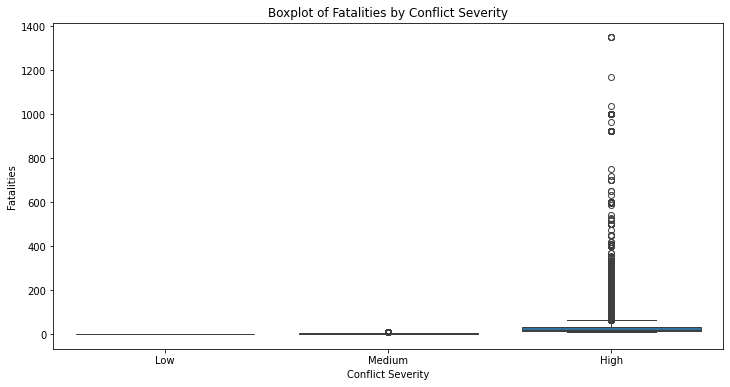

In [77]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['conflict_severity'], y=data['fatalities'])
plt.title('Boxplot of Fatalities by Conflict Severity')
plt.xlabel('Conflict Severity')
plt.ylabel('Fatalities')
plt.show()

This boxplot effectively communicates several critical insights about conflict patterns:

Severity-Fatality Relationship: There is a clear relationship between conflict severity classification and actual fatality counts, with high severity conflicts resulting in significantly more fatalities

Extreme Variation in High Severity Conflicts: The high severity category shows not only higher median fatalities but also much greater variability, with some extremely deadly outlier events

Right-Skewed Distribution: Even within high severity conflicts, most events result in relatively lower fatality counts, with fewer catastrophic events causing extremely high casualties

Outlier Identification: The visualization highlights exceptional cases that warrant further investigation, particularly in the high severity category
This boxplot serves as an effective tool for comparing the three conflict severity groups, providing immediate visual evidence of their different fatality distributions and identifying potential areas for focused analysis of extreme events.

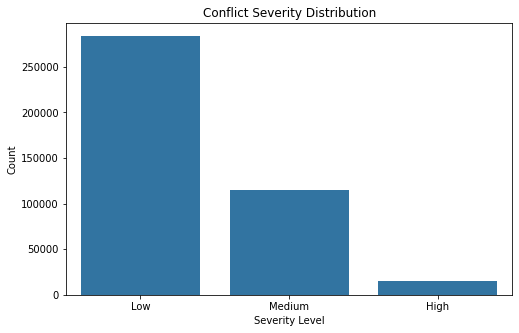

In [78]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data['conflict_severity'])
plt.title('Conflict Severity Distribution')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.show()

The bar chart provides crucial context about the relative frequency of each conflict type:

Low Severity: Approximately 280,000 events (roughly 68% of the dataset)

Medium Severity: Approximately 110,000 events (roughly 27% of the dataset)

High Severity: Approximately 20,000 events (roughly 5% of the dataset)

Inverse Relationship Between Frequency and Impact: Low severity conflicts dominate numerically but have minimal individual impact on fatalities. High severity conflicts, while relatively rare, account for the overwhelming majority of conflict-related deaths.

Concentrated Lethality: Though representing only about 5% of total conflict events, high severity conflicts produce casualties that are orders of magnitude higher than other categories, suggesting concentrated episodes of extreme violence.

Statistical Challenges: The extreme right-skew in the distribution of fatalities, particularly in high severity conflicts, means that mean values would be heavily influenced by outliers. Median values provide more representative measures of typical fatality rates.

In [79]:
plt.figure(figsize=(10, 5))
sns.histplot(data['fatalities'], bins=30, kde=True)
plt.title('Distribution of Fatalities in Conflicts')
plt.xlabel('Fatalities')
plt.ylabel('Co
plt.show()unt')

SyntaxError: EOL while scanning string literal (<ipython-input-79-38ad70a0e075>, line 5)

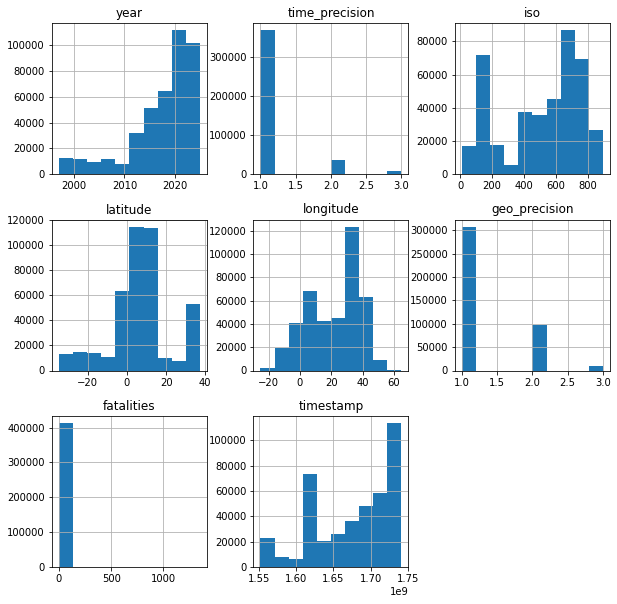

In [ ]:
data[continuous_columns].hist(figsize=(10, 10), bins=10) #plot histograms
plt.show()

**Specific Observations for Data Understanding and Preparation:**


**Correlation Analysis**


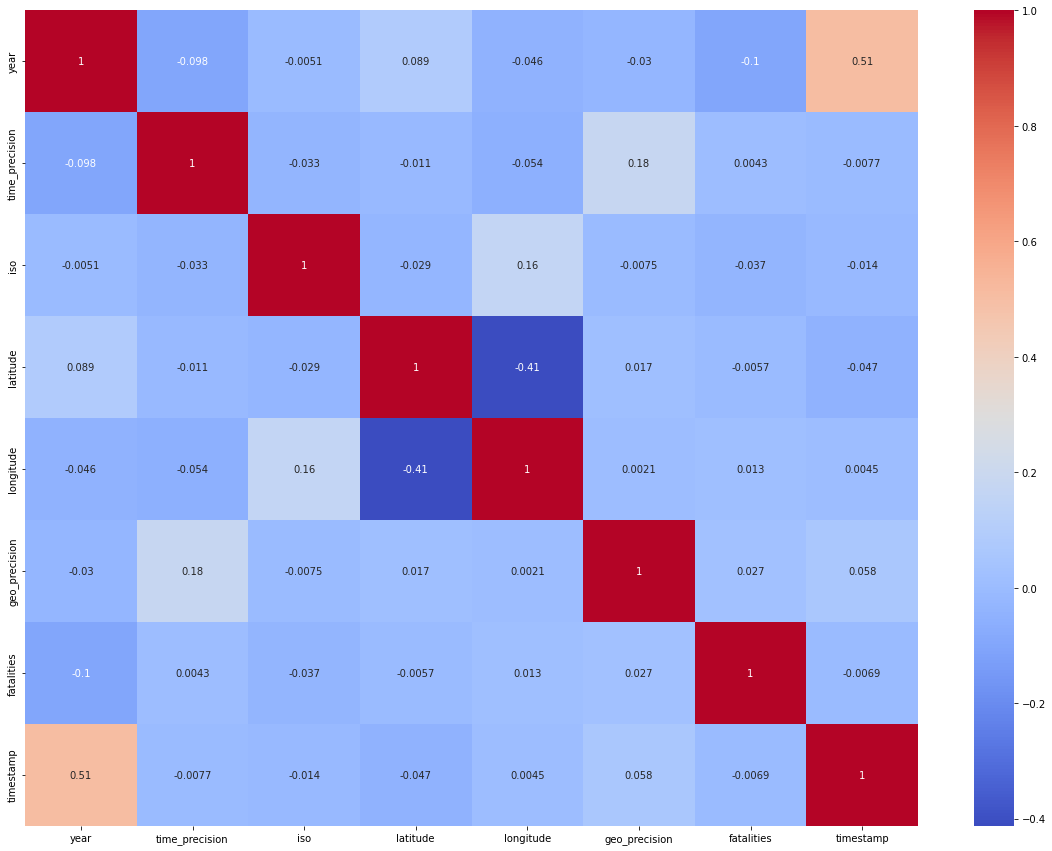

In [ ]:
plt.subplots(figsize=(20,15))
sns.heatmap(data[continuous_columns].corr(),cmap="coolwarm",annot=True);